<img src="https://s3.amazonaws.com/ByC_logo_prod/unit-26963.jpg" alt="Alt text that describes the graphic" width="600" />

# ***Who Is More Likely To Use Mobile Money?***

# Table of contents

- [Abstract](#Abstract)
- [Introduction](#Introduction)
- [1. The problem](#1.-The-problem)
- [2. Purpose of the study](#2.-Purpose-of-the-study)
- [3. Project description](#3.-Project-description)
    - [3.1 Hypothesis](#3.1-Hypothesis)
    - [3.2 Workflow](#3.2-Workflow)
    - [3.3 Methods](#3.3-Methods)
    - [3.4Analysis](#3.4-Analysis)
    - [3.5 Results](#3.5-Results)
- [4. Implementation (optional)](#4.-Implementation-(optional))
- [Conclusion](#Conclusion)
- [References](#References)

##  Abstract 

With mobile money rapidly expanding from its original role as a payment service to a platform for customers to gain access to a broader array of financial services, the survival prospects for traditional banks, micro-lenders and other traditional financial service providers will greately depend not only on their ability to effectively target the financially excluded, but also to enter into strategic partnerships with telecom operators and identify individuals on the mobile network who are most likely to use financial products and services (i.e. savings, credit, insurance) in addition to mobile money.  In this project, I apply machine learning to induce a model to classify an individual into one of four categories based on mobile money and financial service use.  I test the approach using Support Vector Machines, Logistic Regression and Random Forest classifiers and evaluate their performance on a dataset containing socio-economic and demographic information on approximately 7,100 individuals across Tanzania.  The models identify the key drivers of mobile money and financial service use as frequency and recency of financial transactions, mobile phone ownership, regional location and the level of education achieved.  The best model has an overall accuracy of 68.5%.  These results demonstrate the potential for the use of machine learning to refine customer targeting and cross-selling strategies.

## Introduction

The rapid expansion of digital financial services in Sub Saharan Africa ('SSA') over the past decade has presented enormous challenges and opportunities for banks, micro-lenders, mobile network operators ('MNO's), payment service providers ('PSP's), governments and a host of other stakeholders in the financial ecosystem.  

With unique mobile susbcriptions and mobile internet use in SSA projected to reach penetration rates of 50% and 39% respectively by 2025 (up from 44% and 23% in 2018)<sup>1</sup> and with the number of mobile money accounts surpassing formal bank accounts in 2019<sup>2</sup> further disruption in the financial landscape is inveitable.

The business case for increased digitial finance is well documented: for MNOs, digital financial product offerings increase customer satisfaction and reduce churn; for banks, routing transactions through digital channels reduces cost-to-income ratios and a broader customer footprint boosts low-cost deposit mobilization<sup>3</sup>; for governments, mobile money is being increasingly deployed for social policy priorities such as government-to-person ('G2P') transfers.

As mobile money expands from its traditonal role as a payment service to a gateway for millions to gain access to a broader array of financial services such as savings, insurance, credit and investment products<sup>4</sup> the survival prospects for banks, insurance companies, mico-lenders and other traditional financial service providers will greately depend not only on their ability to target the 'unbanked', but also to partner with telecom operators and identify individuals on the mobile network who are most likely to use financial products and services in addition to mobile money.

The goal of this project was to explore the application of machine learning to the problem of predicting the level of financial inclusion of an individual based on a set of socio-economic, demographic and other attributes. Tackling this problem involved a number of steps.

The first step was to frame the underlying decision problem as a classification problem where the target to be predicted was the level of financial inclusion of an individual. I then formulated an overall business hypotheses to test: *'Do demographic and socio-economic drivers exist that make it more (or less) likely that an individual will use mobile money and other financial services?'*. 

The next step involved obtaining a dataset with which to test the hypothesis empirically.  A dataset containing socio-economic and demographic information and the types of financial services used by approximately 7,100 individuals across Tanzania and a geospatial mapping of all financial access points was made available for use by Zindi, an African datascience competition platform based in South Africa.  To add spatial context, the capabilities of Esri’s ArcGIS Technology and The Africa GeoPortal were used.

Exploratory data analysis ('EDA') was performed iteratively to collect, plot, filter, cleanse, and combine variables in the dataset to compare differences and examine relationships between the input features themselves and between the input features and the target variable and to test a series of hypotheses about the functional form of the mapping function between the socio-economic and demographic attributes of an individual and their level of financial inclusion. Statistical measures such as t-tests and correlations were used to test alternate theories about these relationships. The next step involved defining accuracy score, precision, recall and other measures as metrics to be used to either accept or reject our overall hypothesis.  

Once the data was cleaned, candidate classification algorithms were selected based on the size, dimensionality and other attributes of the data and then trained.  The performance of each of the models was then assessed using a k-fold cross validation strategy.  Next, several techniques including recursive feature eliminiation were used to infer the key drivers of the level of financial inclusion of an individual.  The final step was to report on the relative performance of the models and systematic weaknesses and outline next steps. Here is a flow chart that describes the process:

![alt text](Project_Flow.jpg "Project Flow")

## 1. The problem

As mobile money evolves from a payment service to a gateway for customers to gain access to a broader array of financial services, the survival prospects for MNOs in Tanzania and the financial services providers (banks, insurance companies) that have entered into **strategic partnerships** with them will greatly depend on their ability to cross-sell financial products and services (savings, credit, insurance) to existing mobile network subscribers efficiently.

The goal is to determine whether machine learning can be used to tackle the problem of accurately classifying individuals on a mobile network based on the likelihood that they will use mobile money and financial services.  If it can be shown that the models induced using machine learning are effective, financial services providers and MNOs can use the model's predictions to more accurate decisions on which individuals on the mobile network to target for **upselling**, **cross-selling** and other **marketing strategies**.

In this project, the problem involves using machine learning to induce models to classify individuals into one of four mutually exclusive categories based on socio-economic and demographic features associated with each individual, a geospatial mapping of financial access points and other spatial and demographic information.  

This is an example of **supervised learning** which relates to systems where you have a vector of input variables $x$ and an output variable $Y$, and you use an algorithm to estimate the true a mapping function $f(x)$ from the input variables to the output.  In cases such as this where the outcome variable $Y$ is categorical the prediction problem is a problem of **classification**.  Where $Y$ takes on more than two values the prediction task is termed **multi-class classification**.

I test my hypotheses on a dataset that contains socio-economic and demographic information and the types of financial services that are used by approximately 7,000 individuals across Tanzania. The data was extracted from the Financial Sector Deepening Tanzania ('FSDT') Finscope 2017 survey and was prepared for the Mobile Money and Financial Inclusion in Tanzania Challenge in 2019. Permission to use the dataset was provided by Zindi, an African datascience competition platform based in South Africa. 

The types of financial services used by individuals in the dataset were grouped into four mutually exclusive categories:

1. **No_financial_services:** Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance  

2. **Other_only:** Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)  

3. **Mm_only:** Individuals who use mobile money only  

4. **Mm_plus:** Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance)

Socio-economic and demographic information on each individual is described in 32 distinct categorical feature variables.  

A geospatial mapping of all financial access points in Tanzania in 2012 ('FinAccess Map') will be used to enrich the individual survey data.  Financial access points include commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT and was also made available by Zindi.  In order to add spatial context, the capabilities of Esri’s ArcGIS Technology and The Africa GeoPortal will also be used.

More formally, the problem can be stated as follows, if $Y$ takes on a total of 4 distinct values as in this case, the expectation of $Y$ given the vector of input variables $x$ is the posterior probability that $Y$ lies in any one of the four categories given the value of $x$.  So the problem is to induce a model that assigns an individual to a particular category **if** the model's estimate of the posterior probability of membership in that category **exceeds** the estimated posterior probabilities of membership in each of the other 3 categories.


[Back to top](#Table-of-contents)

## 2. Purpose of the study

My firm provides supply chain finance solutions to MNOs and their network installation and maintenance partners in Kenya, Tanzania and Malawi, so I have a keen interest in the growth of mobile technology, including fintech, in Africa.  Recently, MNOs in the region have begun to prioritize seeking ways to unlock value from their vast troves of subscriber data.  A few have developed algorithmic digital lending products that have been phenomenally successful, such as Safaricom's M-Shwari and Fuliza products. This project is exciting because it is relevant to my part of the world and it will be a great way for me to acquire the skills I will need to be able to add advanced data analytics to my company's product suite.


[Back to top](#Table-of-contents)

## 3. Project description

Only 16.7% of the population in Tanzanian has or uses formal banking services.  An additional 55% do not have a bank account use other formal financial services, including mobile money.  The remaining 28% of the population is financially excluded.  63% of adult Tanzanians own a mobile phone<sup>5</sup>  A key business challenge for MNOs and other financial service providers in Tanzania is to find effective ways to grow and retain markets within this set of parameters. In this project we will explore the use of machine learning to predict which individuals are most likely to use mobile money and other financial services (savings, credit, and insurance) in Tanzania.  The results will help MNOs and financial service providers make better business decisions on which individuals to target for **upselling**, **cross-selling**, **churn reduction** and other **marketing strategies**.

[Back to top](#Table-of-contents)

### 3.1 Hypothesis


A key goal of the project is to establish whether or not demographic and socio-economic drivers exist that make it more or less likely that an individual will use mobile money and other financial services.  

A related question with important business implications is whether it is possible to use those characteristics to induce a model that can accurately predict the likelihood that an individual will use mobile money and other financial services.

If the above hypotheses are true, then it is possible for financial services providers to use predictions obtained from the induced model for consumer targeting.

In the predictive modeling context, the likelihood that an individual will use financial services in addition to mobile money can be represented as a response variable $Y$ and certain demographic and socio-economic characteristics associated with that individual, such as income, mobile phone ownership and level of formal education can be represented in terms of explanatory variables or features $x_1$, $x_2$ and $x_3$. The functional relationship between the response and the features can then be expressed as:

$Y$ = $\beta_0$ + $\beta_0$$x_1$ + $\beta_0$$x_2$ + $\beta_0$$x_3$ + $e$

where the $\beta_i$ is slope parameter in the functional relationship between the expectation of $Y$ and $x_i$ and $e$ is an error term that can be thought of as factors other than income level, mobile phone ownership and education that affect the likelihood of mobile money and financial services use.

A null hypothesis that income level, mobile phone ownership and level of formal education have **no effect** on the expected likelihood of the response can be formally stated as follows:

$H_0:$   $\beta_1$ = $\beta_2$ = $\beta_3$ = 0

The null hypothesis is either accepted or rejected empirically.

[Back to top](#Table-of-contents)

### 3.2 Workflow

- **Define the problem** 

As mobile money evolves from a payment service to a gateway for millions to gain access to a broader array of financial services, the survival prospects for traditional financial services providers (banks, insurance companies) in Tanzania will greatly depend on their ability to form **strategic partnerships** MNOs and to cross-sell their financial products and services (savings, credit, insurance) to existing mobile network subscribers efficiently.

The goal is to determine whether machine learning can be used to tackle the problem of accurately classifying individuals on a mobile network based on the likelihood that they will use mobile money and financial services.  If it can be shown that the models induced using machine learning are effective, financial services providers and MNOs can use the model's predictions to make more accurate decisions on which individuals on the mobile network to target for **upselling**, **cross-selling** and other **marketing strategies**.

In this project, the aim is to use machine learning to induce models to classify individuals into one of four mutually exclusive categories based on socio-economic and demographic features associated with each individual, a geospatial mapping of financial access points and other spatial and demographic information.  

This is an example of **supervised learning** which relates to systems where you have a vector of input variables $x$ and an output variable $Y$, and you use an algorithm to induce a mapping function from the input variables to the output.  In cases such as this where the outcome variable $Y$ is categorical the prediction problem is a problem of **classification**.  Where $Y$ takes on more than two values the prediction task is termed **multi-class classification**.

My hypotheses will be tested on a dataset that contains socio-economic and demographic information and the types of financial services that are used by approximately 7,100 individuals across Tanzania. The data was extracted from the Financial Sector Deepening Tanzania ('FSDT') Finscope 2017 survey and was prepared for the Mobile Money and Financial Inclusion in Tanzania Challenge in 2019. Permission to use the dataset was provided by Zindi, an African datascience competition platform based in South Africa.

The types of financial services used by individuals in the dataset were grouped into four mutually exclusive categories:

1. **No_financial_services:** Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance
2. **Other_only:** Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)
3. **Mm_only:** Individuals who use mobile money only
4. **Mm_plus:** Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance)

Socio-economic and demographic information on each individual is described in 32 distinct categorical feature variables.  

A geospatial mapping of all financial access points in Tanzania in 2012 ('FinAccess Map') will be used enrich the individual survey data.  Financial access points include commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT and was also made available by Zindi.  In order to add spatial context, the capabilities of Esri’s ArcGIS Technology and The Africa GeoPortal will also be used.

More formally, if $Y$ takes on a total of 4 distinct values as in this case, the expectation of $Y$ given the vector of input variables $x$ is the posterior probability that $Y$ lies in any one of the four categories given the value of $x$.  So the problem is to use machine learning algorithm to induce a model that assigns an individual to a particular category if the model's estimate of the posterior probability of membership in that category exceeds the estimated posterior probabilities of membership in each of the other 3 categories.

- **Map the system** 

As stated above, the likelihood that an individual will use mobile money and other financial services can be represented as a response variable $Y$ and the demographic and socio-economic characteristics associated with that individual, information from the FinAccess Map and contextual demographic layers of Africa Geoportal can be represented in terms of explanatory variables or features $x_1$, $x_2$ , ... , $x_k$ so that the **true relationship** between the response and the feature vector $x$ can be expressed as:

$Y$ = $f(x)$ + $e$

where the $\beta$ is a slope vector in the functional relationship between the expectation of $Y$ and feature vector $x$ and $e$ is an error term that can be thought of as factors other than those represented by the feature vector $x$ that affect the likelihood of mobile money and financial services use.

In **section 3.4** below I will use exploratory data analysis (**'EDA'**) to collect, plot, filter, cleanse, and combine variables in our survey dataset, the FinAccess Map and the Africa Geoportal to compare differences and examine relationships between the features themselves and between the features and the output variable to enable me to **hypothesize the functional form** of the **true function** $f(x)$.  Statistical measures such as t-tests and correlations will be used to **test alternate theories** about these relationships. This will be an **iterative** process.

- **Define suitable metrics**

In **section 3.5** below I will select suitable metrics that are appropriate for **multi-class classification** problems and have been used for similar tasks.  These metrics will include **accuracy score**, **confusion matrices** (precision, recall, class prediction error) and the **ZeroR** benchmark.  I will fine tune the selection of performance measures depending on whether the distribution of outcome labels is **balanced** or **imbalanced**. Where appropriate, I will formulate tests such as **confidence intervals** and **two-sample t-tests** for significance of the comparative performance of the models.

- **Select modeling tools** 

The appropriateness of different models based on the task at hand, **multi-class classification**, taking into account other parameters such as size, shape and other characteristics of the data, training speed and deployment speed.

- **Implement model**  

Once the training data is cleaned the necessary libraries will be imported to build the models.

- **Evaluate model** 

To ensure that any results obtained do not depend on any given random choice affecting the pair of our training and validation set I will run a **K-fold cross-validation** for each one of the models implemented above to evaluate comparative performance.  Appropriate metrics will be used to evaluate model performance, namely **accuracy score**, **confusion matrices** (precision, recall, class prediction error) and the **zero rule**.  I will fine tune the selection of metrics depending on whether the distribution of outcome labels is **balanced** or **imbalanced** and run tests for the statistical significance of the comparative performance of the models.  Hyperparameter tuning on the winning model(s) will be left for future work.

[Back to top](#Table-of-contents)

### 3.3 Methods

There are a large number of machine learning algorithms that can be applied to multi-class classification problems, including neural networks, genetic algorithms and decision trees.  
 
Our training data contains 7,000 samples.  **Support Vector Machines**, **Decision Tree Classifiers**, **Random Forest Classifiers**, **k-Nearest-Neigbours**, **Gaussian Naive Bayes** and **Logistic Regression** are all widely used for problems with similar parameters.  Support Vector Machines have the advantage that they can handle large numbers of features.
 
All of these classifiers are supported by Scikit-learn's libraries as **'inherently multi-class'**.  We will explore their relative performance in predicting financial service use.

[Back to top](#Table-of-contents)

### 3.4 Analysis 

[Back to top](#Table-of-contents)

Import the necessary libraries.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

Read the data

In [2]:
df = pd.read_csv('mobilemoney/training.csv')
df_bank = pd.read_csv('mobilemoney/banks_for_upload_win.csv')
df_atm = pd.read_csv('mobilemoney/atm_for_upload_win.csv')
df_sacco = pd.read_csv('mobilemoney/sacco_for_upload_win.csv')
df_tppp = pd.read_csv('mobilemoney/3rd_ppp_for_upload_win.csv',engine='python')
df_pos = pd.read_csv('mobilemoney/pos_for_upload_win.csv')
df_mma = pd.read_csv('mobilemoney/mobilemoney_agents_for_upload_win.csv',engine='python')
df_bus = pd.read_csv('mobilemoney/bus_stands_for_upload_win.csv')
df_mfi = pd.read_csv('mobilemoney/microfinance_for_upload_win.csv')
df_post = pd.read_csv('mobilemoney/post_office_for_upload_win.csv')
df_region = pd.read_csv('mobilemoney/df_region.csv')
df_district = pd.read_csv('mobilemoney/df_district.csv')

Rename the columns for easier analysis

In [3]:
df = df.rename(columns=
{
"Q1": "Age", 
"Q2": "Gender", 
"Q3": "Marital_Status", 
"Q4": "Educ", 
"Q5": "Rent_Own", 
"Q6": "Own_Other_Property",
"Q7": "Own_Mobile_Phone", 
"Q8_1": "Salaried_Worker", 
"Q8_2": "Trader", 
"Q8_3": "Service_Provider",
"Q8_4": "Casual_Worker", 
"Q8_5": "Earn_Rent",
"Q8_6": "Earn_Interest_Income", 
"Q8_7": "Earn_Pension", 
"Q8_8": "On_Welfare", 
"Q8_9": "Rely_On_Others", 
"Q8_10": "Expenses_Paid", 
"Q8_11": "Other", 
"Q9": "Employer_Type", 
"Q10": "Goods_Sold", 
"Q11": "Services_Provided", 
"Q12": "Sent_Money_12Mo", 
"Q13": "Last_Sent", 
"Q14": "Received_Money_12Mo", 
"Q15": "Last_Received", 
"Q16": "Goods_Purchase_Freq", 
"Q17": "Bills_Pay_Freq", 
"Q18": "Kiswahili", 
"Q19": "English",
"mobile_money_classification": "Service_Type"
})

Inspect the data

In [4]:
df.head()

,ID,Age,Gender,Marital_Status,Educ,Rent_Own,Own_Other_Property,Own_Mobile_Phone,Salaried_Worker,Trader,...,Bills_Pay_Freq,Kiswahili,English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,Service_Type
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                      7094 non-null int64
Age                     7094 non-null int64
Gender                  7094 non-null int64
Marital_Status          7094 non-null int64
Educ                    7094 non-null int64
Rent_Own                7094 non-null int64
Own_Other_Property      7094 non-null int64
Own_Mobile_Phone        7094 non-null int64
Salaried_Worker         7094 non-null int64
Trader                  7094 non-null int64
Service_Provider        7094 non-null int64
Casual_Worker           7094 non-null int64
Earn_Rent               7094 non-null int64
Earn_Interest_Income    7094 non-null int64
Earn_Pension            7094 non-null int64
On_Welfare              7094 non-null int64
Rely_On_Others          7094 non-null int64
Expenses_Paid           7094 non-null int64
Other                   7094 non-null int64
Employer_Type           7094 non-null int64
Goods_Sold   

In [6]:
df.shape

(7094, 37)

Check for null entries in the dataset.

In [7]:
df.isnull().sum().sum()

0

Verify which features are categorical and continuous

In [8]:
df.nunique().sort_values(ascending=False).head(10)

ID                   7094
Latitude             7056
Longitude            7055
Age                    85
Goods_Sold             11
Services_Provided      11
Educ                    8
Last_Received           7
Last_Sent               7
Employer_Type           7
dtype: int64

**Clean the Data**

Drop features where a single category value contains more than 95% of training examples.  Exclude the target from the filter.

In [9]:
# Exclude the target 'Service_Type' from the filter
for col in df.columns.difference(['Service_Type']): 
    if df[col].value_counts(normalize=True).max(axis='rows') > 0.95:
        df.drop(columns=col,inplace=True)

In [10]:
df.shape

(7094, 32)

In [11]:
df['Goods_Sold'].value_counts()

 1     3300
-1     2712
 6      329
 3      223
 5      169
 7      117
 4       88
 2       58
 8       51
 9       26
 10      21
Name: Goods_Sold, dtype: int64

For each categorical column, combine all category levels with fewer than **100** training examples into new levels. Exclude the target from the filter.

In [12]:
# New arbitrary category level
new_level = 'other'

# Min number of examples per category level
floor = 100

# Extract categorical input features. Exclude the target 'Service_Type'
categorical = [col for col in df.columns.difference(['ID','Latitude','Longitude','Age','Service_Type'])]

for col in df[categorical].columns:
        all_levels = df[col].value_counts().index
        sparse_levels = df[col].value_counts()[df[col].value_counts() < floor].index
        combine_levels = {x: new_level if x in sparse_levels else x for x in all_levels} 
        df[col] = df[col].map(combine_levels)

In [13]:
df['Goods_Sold'].value_counts()

1        3300
-1       2712
6         329
other     244
3         223
5         169
7         117
Name: Goods_Sold, dtype: int64

**Visualize the data**

Plot the target distribution

Text(0, 0.5, 'Count')

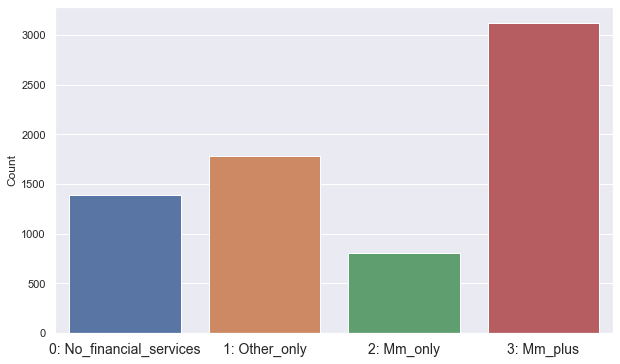

In [14]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
ax = sns.countplot(x="Service_Type", data=df)
ax.set_xticklabels(['0: No_financial_services','1: Other_only','2: Mm_only','3: Mm_plus'], fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("Count")

‘Mm_plus’ takes up 44% of the observations while 'Mm_only' accounts for 11% so there is **class imbalance**. 

Plot a histogram of the type of financial service used grouped by 'Own_Mobile_Phone'

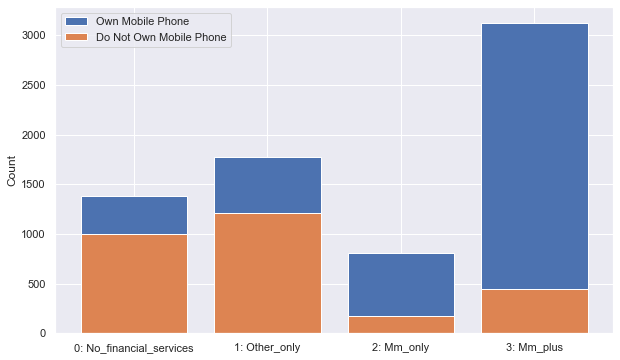

In [15]:
own = df['Service_Type'].loc[df['Own_Mobile_Phone'] == 1].value_counts().sort_index()
do_not_own = df['Service_Type'].loc[df['Own_Mobile_Phone'] == 2].value_counts().sort_index()

service_types = ['0: No_financial_services','1: Other_only','2: Mm_only','3: Mm_plus']
index = [service_type for service_type in service_types]    

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.bar(index, own, label='Own Mobile Phone', bottom=do_not_own)
plt.bar(index, do_not_own, label='Do Not Own Mobile Phone')
plt.ylabel('Count')
plt.xticks(index, service_types)
plt.legend(loc = 'upper left')

plt.show()

As expected, mobile phone ownership seems to be a **strong predictor** of 'Mm_only' and 'Mm_plus' categories

Use **Cramer's V** to create a heatmap of pairwise associations between categorical features 

In [16]:
from scipy import stats
from scipy.stats import chi2_contingency
import math

# Cramer's V
def cramersv(x,y):
    c_matrix = pd.crosstab(x,y)
    r,k = c_matrix.shape
    n = c_matrix.values.sum()
    chi2,p,dof,e = chi2_contingency(c_matrix)
    phi2 = chi2/n
    phi_hat2 = max(0,phi2 - (k-1)*(r-1)/(n-1))
    k_hat = k - math.pow((k-1),2)/(n-1)
    r_hat = r - math.pow((r-1),2)/(n-1)
    min_r_hat_k_hat = min(r_hat,k_hat)
    v_hat = math.sqrt(phi_hat2/(min_r_hat_k_hat-1))
    return v_hat

# Columns with categorical features.  Include the target.
cat_features = [col for col in df.columns if df[col].nunique() < 50]

# Remove features that are collinear with the target
collinear = ['mobile_money','savings','borrowing','insurance']
reduced_features = [var for var in cat_features if var not in collinear]
df_cat = df[reduced_features]

# Matrix of pairwise associations
v_matrix = pd.DataFrame(index = reduced_features)

for i in df_cat.columns:
    stats = []
    for j in df_cat.columns:
        v_hat = cramersv(df_cat[i],df_cat[j])
        stats.append(v_hat)
    v_matrix[i] = stats

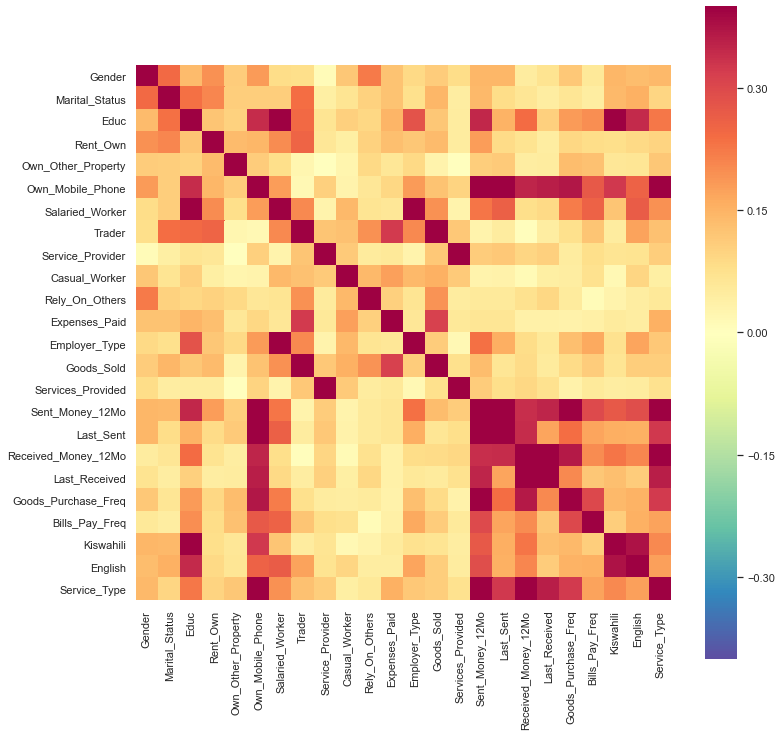

In [17]:
fig = plt.gcf()
fig.set_size_inches(12, 12)
sns.heatmap(v_matrix, cmap='Spectral_r',square=True, vmin=-.4, vmax=.4)

Recency and frequency of transactions are strongly associated with the target and with each other

**Enrich the Data**

Use **reverse geocoding** with **ArcGIS** to load individuals' **'Region'** and **'Subregion'** from their coordinates.

In [ ]:
#Import libraries

from arcgis.gis import GIS
from arcgis.geocoding import reverse_geocode
gis = GIS()

df_region = pd.DataFrame()
lat = []
lon = []
region = []
subregion = []
error = []

for i in df.index:
    try:
        results = reverse_geocode([df['Longitude'].iloc[i], df['Latitude'].iloc[i]])
        lat.append(df['Latitude'].iloc[i])
        lon.append(df['Longitude'].iloc[i])
        region.append(results['address']['Region'])
        subregion.append(results['address']['Subregion'])
        error.append(0)
    except Exception as e:
        lat.append(df['Latitude'].iloc[i])
        lon.append(df['Longitude'].iloc[i])
        region.append(e)
        error.append(1)
df_region['Latitude'] = lat
df_region['Longitude'] = lon
df_region['Region'] = region
df_region['Subregion'] = subregion
df_region['Error'] = error

This process takes quite a while.  Store df_region to csv for later use.

In [ ]:
df_region.to_csv('mobilemoney/df_region.csv', index=False)

In [18]:
df_region.head()

,Latitude,Longitude,Region,Subregion,Error
0,-4.460442,29.811396,Kigoma,Buhigwe,0
1,-6.176438,39.244871,Mjini Magharibi,Mjini,0
2,-6.825702,37.652798,Morogoro,Morogoro,0
3,-3.372049,35.808307,Arusha,Karatu,0
4,-7.179645,31.039095,Rukwa,Nkasi,0


Check for missing values

In [19]:
df_region[df_region.isnull().any(axis=1)]

,Latitude,Longitude,Region,Subregion,Error
141,-6.907859,39.168914,Pwani,NaN,0


Double check the Subregion in 'Pwani'

In [20]:
reverse_geocode([39.167,-6.907859])['address']['Subregion']

'Ilala'

In [21]:
df_region['Subregion'].iloc[141] = 'Ilala'

In [22]:
df_region[df_region.isnull().any(axis=1)]

,Latitude,Longitude,Region,Subregion,Error


Check for errors

In [23]:
df_region.Error.sum()

1

In [24]:
df_region.loc[df_region['Error'] == 1]

,Latitude,Longitude,Region,Subregion,Error
378,-5.875086,39.254217,Cannot perform query. Invalid query parameters...,Cannot perform query. Invalid query parameters...,1


Check the missing 'Region' data

In [25]:
reverse_geocode([39.254217,-5.88])['address']['Region']

'Kaskazini Unguja'

In [26]:
reverse_geocode([39.254217,-5.88])['address']['Subregion']

'Kaskazini A'

Add the missing region data to df_region

In [27]:
df_region['Region'].iloc[378] = 'Kaskazini Unguja'
df_region['Subregion'].iloc[378] = 'Kaskazini A'

In [28]:
df_region.iloc[378]

Latitude             -5.87509
Longitude             39.2542
Region       Kaskazini Unguja
Subregion         Kaskazini A
Error                       1
Name: 378, dtype: object

Double check the 'Region' **'Muchiga'** against the GPS coordinates - it does not exist

In [29]:
df_region.loc[df_region['Region'] == 'Muchiga']

,Latitude,Longitude,Region,Subregion,Error
1041,-9.321775,32.781608,Muchiga,Nakonde,0
1114,-9.318674,32.779676,Muchiga,Nakonde,0
1231,-9.320334,32.780262,Muchiga,Nakonde,0
3002,-9.315998,32.778971,Muchiga,Nakonde,0
3096,-9.315611,32.781536,Muchiga,Nakonde,0
3466,-9.320757,32.780126,Muchiga,Nakonde,0


In [30]:
reverse_geocode([32.781536,-9.305611])['address']['Region']

'Songwe'

In [31]:
reverse_geocode([32.781536,-9.305611])['address']['Subregion']

'Tunduma'

Replace 'Muchiga' with the correct Region - **'Songwe'** - and Subregion - **Tunduma**

In [32]:
df_region.Region = df_region.Region.replace(['Muchiga'],'Songwe')
df_region.Subregion = df_region.Subregion.replace(['Nakonde'],'Tunduma')

In [33]:
df_region.loc[df_region['Region'] == 'Muchiga']

,Latitude,Longitude,Region,Subregion,Error


In [34]:
df_region.isnull().sum().sum()

0

Add the target to df_region for exploratory analysis

In [35]:
df_region['Service_Type'] = df['Service_Type']

In [36]:
df_region.head()

,Latitude,Longitude,Region,Subregion,Error,Service_Type
0,-4.460442,29.811396,Kigoma,Buhigwe,0,0
1,-6.176438,39.244871,Mjini Magharibi,Mjini,0,3
2,-6.825702,37.652798,Morogoro,Morogoro,0,2
3,-3.372049,35.808307,Arusha,Karatu,0,3
4,-7.179645,31.039095,Rukwa,Nkasi,0,3


Plot a histogram of financial service type by Region

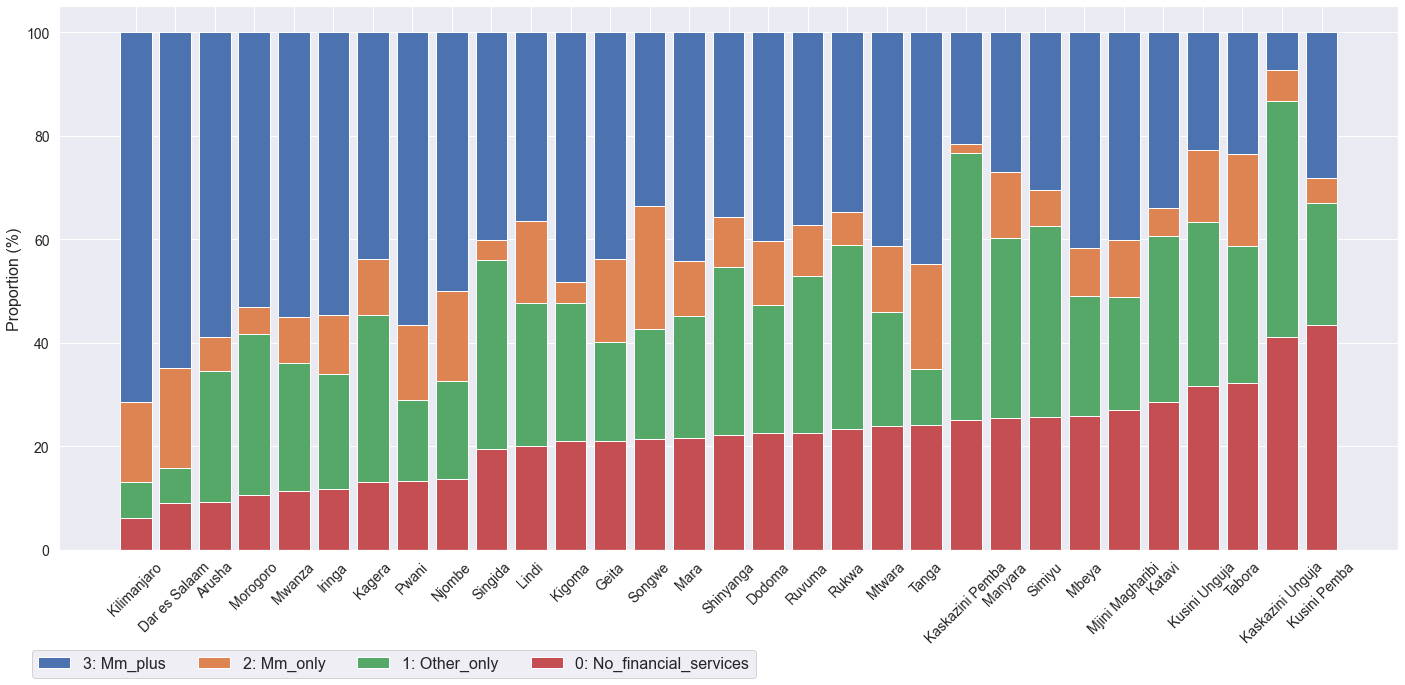

In [37]:
regional = pd.DataFrame()
total = df_region.Region.value_counts().sort_index()
regional['Mm_plus'] = df_region['Region'].loc[df_region['Service_Type'] == 3].value_counts().sort_index()
regional['Mm_only'] = df_region['Region'].loc[df_region['Service_Type'] == 2].value_counts().sort_index()
regional['Other_only'] = df_region['Region'].loc[df_region['Service_Type'] == 1].value_counts().sort_index()
regional['No_financial_services'] = df_region['Region'].loc[df_region['Service_Type'] == 0].value_counts().sort_index()
regional = regional.loc[:].div(total*.01,axis = 'rows').rename_axis('Region').reset_index()
regional = regional.sort_values(by = 'No_financial_services')

regions = regional.Region   
index = [region for region in regions]

fig = plt.gcf()
fig.set_size_inches(24, 10)
plt.bar(index, regional.Mm_plus.values, label='3: Mm_plus', bottom = regional.Mm_only.values + regional.Other_only.values + regional.No_financial_services.values)
plt.bar(index, regional.Mm_only.values, label='2: Mm_only', bottom = regional.Other_only.values + regional.No_financial_services.values)
plt.bar(index, regional.Other_only.values, label='1: Other_only', bottom = regional.No_financial_services.values)
plt.bar(index, regional.No_financial_services.values, label='0: No_financial_services')

plt.ylabel('Proportion (%)',fontsize = 16)
plt.xticks(index, regions, rotation = 45,fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'lower center', ncol=4, bbox_to_anchor=(0.25, -0.25), fontsize = 16)

plt.show()

As expected, the level of financial inclusion is higher in urban regions such as **Dar-es-Salaam**, **Arusha** and **Kilimanjaro** than in rural areas such as **Ruvuma** and **Tabora.**

Check for variation in the target within regions

In [38]:
df_region.Subregion.value_counts().tail(25)

Karagwe        21
Sikonge        21
Bahi           20
Chemba         20
Kisarawe       20
Mwanga         20
Makete         19
Longido        18
Rufiji         18
Chunya         18
Musoma         17
Nyang'Hwale    17
Mkinga         17
Ludewa         17
Busega         16
Missenyi       16
Urambo         14
Liwale         14
Kakonko        12
Siha           11
Gairo          11
Mkoani         11
Nyasa          11
Mafia           9
Pangani         7
Name: Subregion, dtype: int64

Drop Subregions with few examples

In [39]:
new_level = "other"
all_subs = df_region.Subregion.value_counts().index
sparse_levels = df_region.Subregion.value_counts()[df_region.Subregion.value_counts()< 20].index
combine_levels = {x: new_level if x in sparse_levels else x for x in all_subs} 
df_region['Subregion_2'] = df_region.Subregion.map(combine_levels)

In [40]:
df_region.Subregion_2.nunique()

129

Find the level of association between **Region** and **Subregion** and the target

In [41]:
cramersv(df_region['Service_Type'],df_region['Region'])

0.18495304284469613

In [42]:
cramersv(df_region['Service_Type'],df_region['Subregion_2'])

0.222171080430491

Subregion has a higher level of association with the target

'Subregion' is missing **recent** administrative boundaries.  Use an updated feature layer to load individuals' **District** from their coordinates.

In [ ]:
import requests

feature_server = 'https://services1.arcgis.com/gGHDlz6USftL5Pau/arcgis/rest/services/Tanzania_District/FeatureServer'
url = feature_server +'/0/query'

df_district = pd.DataFrame()
lat = []
lon = []
dist = []
error = []
counter = []

for i in range(5):
#for i in df.index:
    try:
        query_params  = {'f': 'pjson', 'outFields': '*', 'geometryType':'esriGeometryPoint', 'inSR': '4326',
                         'spatialRel': 'esriSpatialRelIntersects', 'distance':'0.01', 'units': 'esriSRUnit_Kilometer',
                         'geometry': "{x:"+str(df['Longitude'].iloc[i])+", y:"+str(df['Latitude'].iloc[i])+"}"}
        response = requests.request("GET", url, params = query_params)
        lat.append(df['Latitude'].iloc[i])
        lon.append(df['Longitude'].iloc[i])
        dist.append(response.json()['features'][0]['attributes']['DistrictNa'])
        error.append(0)
        counter.append(i)
    except Exception as e:
        dist.append(e)
        error.append(1)
        counter.append(i)
df_district['counter'] = counter
df_district['Latitude'] = lat
df_district['Longitude'] = lon
df_district['District'] = dist
df_district['Errors'] = error

This process takes quite a while.  Store df_district to csv for later use.

In [ ]:
df_district.to_csv('mobilemoney/df_district.csv', index=False)

Check for indexing errors

In [43]:
df_district.head()

,counter,Latitude,Longitude,District,Errors
0,0,-4.460442,29.811396,Buhigwe,0
1,1,-6.176438,39.244871,Magharibi,0
2,2,-6.825702,37.652798,Morogoro Urban,0
3,3,-3.372049,35.808307,Karatu,0
4,4,-7.179645,31.039095,Nkasi,0


In [44]:
df_district['latcheck'] = df.Latitude

In [45]:
df_district['latdiff'] = df_district['latcheck'] - df['Latitude']

In [46]:
df_district.latdiff.sum()

0.0

Check for null values

In [47]:
df_district[df_district.isnull().any(axis=1)]

,counter,Latitude,Longitude,District,Errors,latcheck,latdiff


Check for reverse geocoding errors

In [48]:
df_district.loc[df_district['Errors'] == 1].sort_values(by = ['Latitude'])

,counter,Latitude,Longitude,District,Errors,latcheck,latdiff
2910,2910,-10.257334,40.193767,list index out of range,1,-10.257334,0.0
5734,5734,-10.256892,40.195975,list index out of range,1,-10.256892,0.0
3214,3214,-8.189125,39.313559,list index out of range,1,-8.189125,0.0
6146,6146,-8.188592,39.314331,list index out of range,1,-8.188592,0.0
6382,6382,-8.188564,39.314508,list index out of range,1,-8.188564,0.0
2053,2053,-5.875356,39.256089,list index out of range,1,-5.875356,0.0
378,378,-5.875086,39.254217,list index out of range,1,-5.875086,0.0
6161,6161,-5.875002,39.255798,list index out of range,1,-5.875002,0.0
2739,2739,-5.874594,39.256325,list index out of range,1,-5.874594,0.0
2177,2177,-5.874485,39.256435,list index out of range,1,-5.874485,0.0


In [49]:
df_district.loc[(df_district.Errors == 1) & (df_district.Latitude < -2) & (df_district.Latitude > -3),'District'] = 'Busega'

In [50]:
df_district.loc[(df_district.Errors == 1) & (df_district.Latitude < -5) & (df_district.Latitude > -6),'District'] = 'Kaskazini A'

In [51]:
df_district.loc[(df_district.Errors == 1) & (df_district.Latitude < -7) & (df_district.Latitude > -9),'District'] = 'Rufiji'

In [52]:
df_district.loc[(df_district.Errors == 1) & (df_district.Latitude < -10) & (df_district.Latitude > -11),'District'] = 'Mtwara Rural'

In [53]:
df_district.loc[(df_district.Errors == 1) & (df_district.Latitude < -4) & (df_district.Latitude > -5),'District'] = 'Micheweni'

In [54]:
df_district.loc[(df_district.Errors == 1) & (df_district.Latitude < -1) & (df_district.Latitude > -2),'District'] = 'Rorya'

In [55]:
df_district['Subregion'] = df_region['Subregion']

Check the difference between **Subregion** and **District**

In [56]:
df_district.loc[df_district['Subregion'] != df_district['District'] ].groupby(['Subregion','District']).count()[['Latitude']].head(20)

Latitude
Subregion District                            
Arusha    Arusha Urban                      79
          Meru                               1
Babati    Babati Urban                      21
Bukoba    Bukoba Rural                      30
          Bukoba Urban                      18
Butiam    Butiama                           18
          Musoma Municipal                  25
Dodoma    Chamwino                           2
          Dodoma Urban                      38
Hanang    Babati                             1
          Kondoa                             1
Handeni   Handeni Township Authority         7
Ilala     Temeke                            10
Iringa    Iringa Rural                      95
          Iringa Urban                      65
Kahama    Kahama Township Authority         39
Kasulu    Kasulu Township Authority         23
Kibaha    Kibaha Urban                      21
Kigoma    Kigoma Municipal-Ujiji            26
          Kigoma Rural                      15

In [57]:
df_district.District.value_counts().tail(25)

Morogoro Urban                18
Bukoba Urban                  18
Rufiji                        18
Kisarawe                      18
Songea Rural                  18
Makete                        18
Musoma                        17
Njombe Rural                  17
Nyang'wale                    17
Ludewa                        17
Missenyi                      16
Kigoma Rural                  15
Kibaha                        15
Korogwe Township Authority    15
Urambo                        14
Liwale                        14
Siha                          13
Lindi Urban                   12
Gairo                         12
Kakonko                       12
Mkoani                        11
Nyasa                         11
Mafia                          9
Handeni Township Authority     7
Pangani                        7
Name: District, dtype: int64

Remove Districts with few training examples

In [58]:
new_level = 'other'
all_dist = df_district.District.value_counts().index
sparse_levels = df_district.District.value_counts()[df_district.District.value_counts()<20].index
combine_levels = {x: new_level if x in sparse_levels else x for x in all_dist} 
df_district['District_2'] = df_district.District.map(combine_levels)

In [59]:
df_district.District_2.nunique()

145

In [60]:
cramersv(df['Service_Type'],df_district['District_2'])

0.22569086374272282

The level of association with the target is slightly higher for **'District'** than **'Subregion'**

In [61]:
df_district.head()

,counter,Latitude,Longitude,District,Errors,latcheck,latdiff,Subregion,District_2
0,0,-4.460442,29.811396,Buhigwe,0,-4.460442,0.0,Buhigwe,Buhigwe
1,1,-6.176438,39.244871,Magharibi,0,-6.176438,0.0,Mjini,Magharibi
2,2,-6.825702,37.652798,Morogoro Urban,0,-6.825702,0.0,Morogoro,other
3,3,-3.372049,35.808307,Karatu,0,-3.372049,0.0,Karatu,Karatu
4,4,-7.179645,31.039095,Nkasi,0,-7.179645,0.0,Nkasi,Nkasi


Create a new dataframe call **df_dist_final** and drop unnecessary columns

In [62]:
df_dist_final = df_district.copy()
cols = ['counter','Latitude','Longitude','Errors','latcheck','latdiff','Subregion','District_2']
df_dist_final.drop(columns=cols,inplace=True)

In [63]:
df_dist_final.head()

,District
0,Buhigwe
1,Magharibi
2,Morogoro Urban
3,Karatu
4,Nkasi


Compute the **Haversine** distance between each individual and the nearest financial access point

In [64]:
def haversine(coord1,lat_2,lon_2):
    lat_1,lon_1 = coord1 
    r = 6371
    phi1 = np.radians(lat_1)
    lamda1 = np.radians(lon_1)
    phi2 = np.radians(lat_2)
    lambda2 = np.radians(lon_2)
    delta_phi = phi2 - phi1
    delta_lambda = lambda2 - lamda1
    d = 2*r*np.arcsin(np.sqrt((1- np.cos(delta_phi))/2 + \
        np.cos(phi1)*np.cos(phi2)*(1- np.cos(delta_lambda))/2))
    return d

#Create a dataframe to store computed distances

df_points = pd.DataFrame()

# Individual lat lon coords

indiv = df[['Latitude', 'Longitude']].apply(tuple, axis=1).values

# Lat lon coords of each access point type

access_points = {'mma': df_mma, 'bank': df_bank, 'atm': df_atm, 'sacco': df_sacco, 'tppp': df_tppp,
                 'pos': df_pos, 'bus': df_bus, 'mfi': df_mfi, 'post': df_post}  

# Compute min distance to each access point type

for i, point_type in access_points.items():
    distance = []
    min_distance = []
    for j in range(len(indiv)): 
        distance = haversine(indiv[j],point_type.latitude.values,point_type.longitude.values)
        nearest = np.amin(distance)
        min_distance.append(nearest)
    df_points[i] = min_distance

Compute pairwise correlations between access point distance measures and check for collinearity

In [65]:
df_points.corr()

,mma,bank,atm,sacco,tppp,pos,bus,mfi,post
mma,1.000000,0.610205,0.610601,0.503445,0.348928,0.354833,0.303327,0.356203,0.469619
bank,0.610205,1.000000,0.877782,0.719958,0.422560,0.435872,0.399039,0.516396,0.598148
atm,0.610601,0.877782,1.000000,0.701286,0.423040,0.516346,0.396164,0.508369,0.565160
sacco,0.503445,0.719958,0.701286,1.000000,0.377937,0.394687,0.381210,0.633654,0.534067
tppp,0.348928,0.422560,0.423040,0.377937,1.000000,0.359677,0.807126,0.439752,0.817416
pos,0.354833,0.435872,0.516346,0.394687,0.359677,1.000000,0.376802,0.465901,0.285168
bus,0.303327,0.399039,0.396164,0.381210,0.807126,0.376802,1.000000,0.467924,0.672610
mfi,0.356203,0.516396,0.508369,0.633654,0.439752,0.465901,0.467924,1.000000,0.363848
post,0.469619,0.598148,0.565160,0.534067,0.817416,0.285168,0.672610,0.363848,1.000000


As expected, distance to the nearest **bank** and **atm** are highly correlated.

There is a very small number of **bus stops** and **post offices** - drop these columns.

In [66]:
df_post.shape[0]

180

In [67]:
df_bus.shape[0]

49

In [68]:
cols = ['post','bus']
df_points.drop(columns=cols,inplace=True)

Plot the distribution of the distance to the nearest **mobile money agent** by the target

First, add the target to df_points

In [69]:
df_points['Service_Type'] = df['Service_Type']

In [70]:
df_points.head()

,mma,bank,atm,sacco,tppp,pos,mfi,Service_Type
0,3.245788,34.077154,50.664821,32.174329,34.086475,227.225120,33.904747,0
1,1.292799,2.210803,2.207341,4.918423,2.363903,5.613890,2.417876,3
2,0.122506,1.128424,1.084240,0.335244,0.288060,139.064094,1.224672,2
3,0.031501,14.748761,6.268469,5.115917,5.143686,37.040948,14.971460,3
4,7.665565,35.903198,35.885429,36.110567,250.102209,106.685663,107.664933,3


**Top code** outliers

In [71]:
df_points.mma.loc[df_points.mma > df_points.mma.quantile(.98)].count()

142

In [72]:
df_points['mma_top'] = df_points.mma

In [73]:
thresh = df_points.mma_top.quantile(.98)

In [74]:
thresh

44.20228770027235

In [75]:
df_points.loc[df_points.mma_top > thresh, 'mma_top'] = thresh

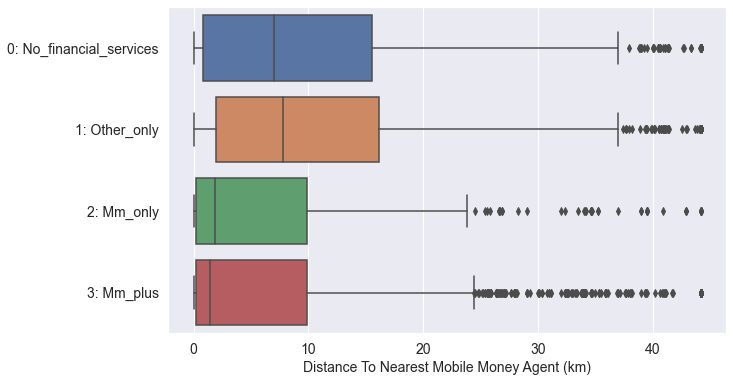

In [76]:
service_types = ['0: No_financial_services','1: Other_only','2: Mm_only','3: Mm_plus']
index = [service_type for service_type in service_types]    

fig = plt.gcf()
fig.set_size_inches(10, 6)
ax = sns.boxplot(x ='mma_top', y = 'Service_Type', data = df_points, orient = 'h')
ax.set_yticklabels(['0: No_financial_services','1: Other_only','2: Mm_only','3: Mm_plus'], fontsize=14)
ax.set_ylabel("")
ax.set_xlabel('Distance To Nearest Mobile Money Agent (km)', fontsize=14)
ax.tick_params(axis="x", labelsize=14)


plt.show()

The mean distance to the nearest mobile money agent is higher for **'No_financial_services'** and **'Other_only'** than for **'Mm_only'** and **'Mm_plus'**

Handle outliers by **discretizing** the distances to the nearest access points.  

Use equal frequency binning to minimize loss of information.

In [77]:
for col in df_points.columns.difference(['Service_Type']):
    df_points[col + '_band'], bins_dist = pd.qcut(df_points[col],8,labels = [0,1,2,3,4,5,6,7], retbins= True)

Drop continuous valued columns

In [78]:
cols = ['mma','bank','atm','sacco','tppp','pos','mfi','mma_top','mma_top_band']
df_points.drop(columns=cols,inplace=True)

In [79]:
df_points.head()

,Service_Type,atm_band,bank_band,mfi_band,mma_band,pos_band,sacco_band,tppp_band
0,0,6,5,4,3,7,5,5
1,3,1,1,1,3,1,2,1
2,2,0,0,0,1,7,0,0
3,3,2,3,2,0,4,2,2
4,3,5,5,7,4,7,6,7


Compute pairwise associations between access point distances and between distances and the target.  Check for collinearity.

In [80]:
# Matrix of pairwise associations
v_mat_access = pd.DataFrame()
v_mat_access = pd.DataFrame(index = df_points.columns)

for i in df_points.columns:
    stats = []
    for j in df_points.columns:
        v_hat = cramersv(df_points[i],df_points[j])
        stats.append(v_hat)
    v_mat_access[i] = stats

In [81]:
v_mat_access

,Service_Type,atm_band,bank_band,mfi_band,mma_band,pos_band,sacco_band,tppp_band
Service_Type,1.000000,0.150910,0.141311,0.129274,0.153761,0.134250,0.139082,0.154327
atm_band,0.150910,1.000000,0.734877,0.486663,0.324912,0.442370,0.446951,0.468047
bank_band,0.141311,0.734877,1.000000,0.498438,0.310712,0.437048,0.437829,0.440413
mfi_band,0.129274,0.486663,0.498438,1.000000,0.263256,0.463440,0.411998,0.372326
mma_band,0.153761,0.324912,0.310712,0.263256,1.000000,0.271989,0.347791,0.378257
pos_band,0.134250,0.442370,0.437048,0.463440,0.271989,1.000000,0.386405,0.378992
sacco_band,0.139082,0.446951,0.437829,0.411998,0.347791,0.386405,1.000000,0.394914
tppp_band,0.154327,0.468047,0.440413,0.372326,0.378257,0.378992,0.394914,1.000000


**'bank_band'** is highly associated with **'atm_band'** and has a lower association with 'Service_Type' 

Create a new dataframe called **df_points_final** and drop **'bank_band'** and 'Service_Type'

In [82]:
df_points_final = df_points.copy()
cols = ['bank_band','Service_Type']
df_points_final.drop(columns = cols,inplace=True)

In [83]:
df_points_final.head()

,atm_band,mfi_band,mma_band,pos_band,sacco_band,tppp_band
0,6,4,3,7,5,5
1,1,1,3,1,2,1
2,0,0,1,7,0,0
3,2,2,0,4,2,2
4,5,7,4,7,6,7


**District** has **high cardinality**.  

**Mean (likelihood) encoding**

One-hot encode the target then drop one column (all four target columns are linearly dependent). 

In [84]:
df_mean = df_dist_final.copy()
df_mean['Service_Type'] = df['Service_Type']
df_mean = pd.get_dummies(df_mean, columns=['Service_Type'], drop_first = True)

In [85]:
df_mean.head()

,District,Service_Type_1,Service_Type_2,Service_Type_3
0,Buhigwe,0,0,0
1,Magharibi,0,0,1
2,Morogoro Urban,0,1,0
3,Karatu,0,0,1
4,Nkasi,0,0,1


Get the 3 (i.e. N-1) target labels

In [86]:
target_labels = df_mean.columns.difference(['District'])

In [87]:
target_labels

Index(['Service_Type_1', 'Service_Type_2', 'Service_Type_3'], dtype='object')

Mean encode 'District'

First, get the frequency distribution of District values

In [88]:
df_mean.District.value_counts().describe()

count    169.000000
mean      41.976331
std       26.654525
min        7.000000
25%       23.000000
50%       35.000000
75%       53.000000
max      143.000000
Name: District, dtype: float64

Average number of training examples for each District is 42

**Additive smoothing**

Set the smoothing factor to 25

In [89]:
import category_encoders as ce

encoder = ce.MEstimateEncoder(m = 25)

for label in target_labels:
    df_mean['Mean_' + label] = encoder.fit_transform(df_mean.District,df_mean[label])

In [90]:
df_mean.head()

,District,Service_Type_1,Service_Type_2,Service_Type_3,Mean_Service_Type_1,Mean_Service_Type_2,Mean_Service_Type_3
0,Buhigwe,0,0,0,0.259379,0.069698,0.491206
1,Magharibi,0,0,1,0.244438,0.112374,0.409215
2,Morogoro Urban,0,1,0,0.168973,0.135660,0.581776
3,Karatu,0,0,1,0.283047,0.128416,0.459284
4,Nkasi,0,0,1,0.413502,0.077342,0.274617


In [91]:
df_mean_final = df_mean.copy()
cols = ['District','Service_Type_1','Service_Type_2','Service_Type_3']
df_mean_final.drop(columns = cols,inplace=True)

In [92]:
df_mean_final.head()

,Mean_Service_Type_1,Mean_Service_Type_2,Mean_Service_Type_3
0,0.259379,0.069698,0.491206
1,0.244438,0.112374,0.409215
2,0.168973,0.135660,0.581776
3,0.283047,0.128416,0.459284
4,0.413502,0.077342,0.274617


Discretize **'Age'**

In [93]:
df_final = df.copy()

In [94]:
df_final['Age_Band'], bins_dist = pd.qcut(df_final['Age'],8,labels = [0,1,2,3,4,5,6,7], retbins= True)

In [95]:
df_final.drop(columns= 'Age',inplace=True)

In [96]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 32 columns):
ID                     7094 non-null int64
Gender                 7094 non-null int64
Marital_Status         7094 non-null int64
Educ                   7094 non-null object
Rent_Own               7094 non-null object
Own_Other_Property     7094 non-null int64
Own_Mobile_Phone       7094 non-null int64
Salaried_Worker        7094 non-null int64
Trader                 7094 non-null int64
Service_Provider       7094 non-null int64
Casual_Worker          7094 non-null int64
Rely_On_Others         7094 non-null int64
Expenses_Paid          7094 non-null int64
Employer_Type          7094 non-null object
Goods_Sold             7094 non-null object
Services_Provided      7094 non-null object
Sent_Money_12Mo        7094 non-null int64
Last_Sent              7094 non-null object
Received_Money_12Mo    7094 non-null int64
Last_Received          7094 non-null int64
Goods_Purchase_Freq    7094

Drop unnessary columns

In [97]:
cols = ['ID','Latitude','Longitude','mobile_money','savings','borrowing','insurance']
df_final.drop(columns = cols,inplace=True)

In [98]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 25 columns):
Gender                 7094 non-null int64
Marital_Status         7094 non-null int64
Educ                   7094 non-null object
Rent_Own               7094 non-null object
Own_Other_Property     7094 non-null int64
Own_Mobile_Phone       7094 non-null int64
Salaried_Worker        7094 non-null int64
Trader                 7094 non-null int64
Service_Provider       7094 non-null int64
Casual_Worker          7094 non-null int64
Rely_On_Others         7094 non-null int64
Expenses_Paid          7094 non-null int64
Employer_Type          7094 non-null object
Goods_Sold             7094 non-null object
Services_Provided      7094 non-null object
Sent_Money_12Mo        7094 non-null int64
Last_Sent              7094 non-null object
Received_Money_12Mo    7094 non-null int64
Last_Received          7094 non-null int64
Goods_Purchase_Freq    7094 non-null object
Bills_Pay_Freq         709

**One-hot encode** all other categorical features in df except 'Age_Band' and the target.  Drop the first column to avoid multi-collinearity.

In [99]:
df_final = pd.get_dummies(df_final, columns= df_final.columns.difference(['Age_Band','Service_Type']), drop_first = True)

In [100]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 65 columns):
Service_Type                 7094 non-null int64
Age_Band                     7094 non-null category
Bills_Pay_Freq_1             7094 non-null uint8
Bills_Pay_Freq_4             7094 non-null uint8
Bills_Pay_Freq_5             7094 non-null uint8
Bills_Pay_Freq_other         7094 non-null uint8
Casual_Worker_1              7094 non-null uint8
Educ_2                       7094 non-null uint8
Educ_3                       7094 non-null uint8
Educ_5                       7094 non-null uint8
Educ_6                       7094 non-null uint8
Educ_7                       7094 non-null uint8
Educ_other                   7094 non-null uint8
Employer_Type_1              7094 non-null uint8
Employer_Type_2              7094 non-null uint8
Employer_Type_other          7094 non-null uint8
English_2                    7094 non-null uint8
English_4                    7094 non-null uint8
English_

Add **location** and **proximity to access point** measures 

In [101]:
df_final = pd.concat([df_final,df_points_final],axis=1)

In [102]:
df_final = pd.concat([df_final,df_mean_final],axis=1)

In [103]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 74 columns):
Service_Type                 7094 non-null int64
Age_Band                     7094 non-null category
Bills_Pay_Freq_1             7094 non-null uint8
Bills_Pay_Freq_4             7094 non-null uint8
Bills_Pay_Freq_5             7094 non-null uint8
Bills_Pay_Freq_other         7094 non-null uint8
Casual_Worker_1              7094 non-null uint8
Educ_2                       7094 non-null uint8
Educ_3                       7094 non-null uint8
Educ_5                       7094 non-null uint8
Educ_6                       7094 non-null uint8
Educ_7                       7094 non-null uint8
Educ_other                   7094 non-null uint8
Employer_Type_1              7094 non-null uint8
Employer_Type_2              7094 non-null uint8
Employer_Type_other          7094 non-null uint8
English_2                    7094 non-null uint8
English_4                    7094 non-null uint8
English_

Scale all columns in df_final except the target

In [104]:
from sklearn import preprocessing

cols_to_scale = df_final.columns.difference(['Service_Type'])
scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(df_final[cols_to_scale])
df_scaled = pd.DataFrame(df_scaled, columns= cols_to_scale)

In [105]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 73 columns):
Age_Band                     7094 non-null float64
Bills_Pay_Freq_1             7094 non-null float64
Bills_Pay_Freq_4             7094 non-null float64
Bills_Pay_Freq_5             7094 non-null float64
Bills_Pay_Freq_other         7094 non-null float64
Casual_Worker_1              7094 non-null float64
Educ_2                       7094 non-null float64
Educ_3                       7094 non-null float64
Educ_5                       7094 non-null float64
Educ_6                       7094 non-null float64
Educ_7                       7094 non-null float64
Educ_other                   7094 non-null float64
Employer_Type_1              7094 non-null float64
Employer_Type_2              7094 non-null float64
Employer_Type_other          7094 non-null float64
English_2                    7094 non-null float64
English_4                    7094 non-null float64
English_5                 

### 3.5 Results

What are your results?

[Back to top](#Table-of-contents)

**Model Selection**

Our problem is an example of **supervised learning** which relates to systems where you have input variables $x$ and an output variable $Y$, and you use an algorithm to induce the mapping function from the input to the output, $f(x)$.
 
As stated above, the problem involves determining the output of variables within a given category (e.g. 'Other_only', 'Mm_only') based on socio-economic and demographic features, or **classification**.
 
The target variable has four categories based on the types of financial services used by each respondent.  The categories are mutually exclusive as each respondent is assigned to one and only one category. This is an instance of **multi-class classification**.
 
There are a large number of machine learning algorithms that can be applied to our problem type, including neural networks, genetic algorithms and decision trees.  
 
Our training data contains 7,100 samples with a combination of continuous and categorical features.  Based on this information we consider the following models.
 
+ **Support Vector Machines** are supervised learning algorithms that search for hyperplanes in the feature space in order to to classify observations.  SVMs are effective in high dimensional spaces and when the number of features exceed the number of samples. They are not suitable for large datasets.

+ **Random Forest Classifiers** consist of a large number of decision trees that operate as an ensemble.  They can handle high dimensional data, is robust to outliers and high dimensional features and can handle unbalanced data.

+ **Logistic Regression** models predict a logit transformation of the response variable.  They are highly interpretable, don't require feature scaling and outputs well calibrated probabilities.  A disadvantage is that they are not suited to non-linear problems.

All of these classifiers are supported by Scikit-learn's libraries as **'inherently multi-class'**.  We will explore their relative performance in predicting financial service use.

**Training the models, validating and testing results**

In order to ensure that any results obtained do not depend on any given random choice affecting the pair of our training and validation set run a **K-fold cross-validation** for each one of the models above in order to choose our learning algorithm. 

We set number of folds **n_splits = 10** due to computational constraints, i.e. the amount of time it will take to train and validate the 3 algorithms.

We will use the results to evaluate the 3 models and discard models that underperform.

Prepare the data.

In [106]:
df_train = df_scaled.copy()

In [107]:
df_train['Service_Type'] = df_final['Service_Type']

In [108]:
features = df_train.drop('Service_Type', axis = 1)
labels = df_train['Service_Type']

In [109]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

svm_clf = svm.LinearSVC()
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier(random_state = 5)

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score #score evaluation

kfold = KFold(n_splits=10, random_state=5, shuffle=True)
moments = ['Mean', 'Stdv']
models_df = pd.DataFrame(index = moments)
df_accuracy = pd.DataFrame()
models = {'SVM': svm_clf, 'LR':lr_clf, 'RF': rf_clf} 

for k,v in models.items():
    stats = []
    cv_result = cross_val_score(v, features, labels, cv = kfold, scoring = "accuracy")
    cv_result = cv_result*100
    df_accuracy[k] = cv_result
    stats.append(cv_result.mean())
    stats.append(cv_result.std())
    models_df[k] = stats

In [110]:
df_accuracy

,SVM,LR,RF
0,68.450704,69.295775,67.183099
1,71.549296,72.253521,68.450704
2,69.577465,70.140845,67.183099
3,67.887324,67.887324,66.478873
4,68.970381,68.265162,66.713681
5,67.700987,66.290550,65.726375
6,67.559944,68.406206,66.713681
7,68.688293,70.239774,66.290550
8,66.431594,66.008463,65.021157
9,66.149506,66.008463,64.315938


Create a box plot of the performance of the 6 classifiers.

Text(0, 0.5, 'Accuracy (%)')

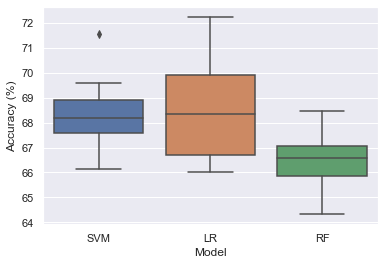

In [111]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_accuracy))
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

In [112]:
models_df

,SVM,LR,RF
Mean,68.296549,68.479608,66.407716
Stdv,1.483408,1.953809,1.111061


Logistic regression exhibits the highest average score accross the 10 folds but SVM has **lowest variation** in performance.

Let us take a closer look at the SVM result.  The average accuracy score was 68.28%.  The standard deviation of the sample of 10 trials was 0.0105.  The number of trials was 10.  The upper (100 - 95)/2 = 2.5% critical value for the t-distribution with 9 degrees of freedom is 2.262.  So our **95% percent confidence interval** on this result is **68.29% +/- 3.3%**.

For **imbalanced** datasets such as ours, overall accuracy score is not always an appropriate measure.  If an overwhelming number of examples are from one class even poor models can achieve high accuracy scores. 

Plot **confusion matrices** to do a further analysis of the results for the reduced set of 3 models.

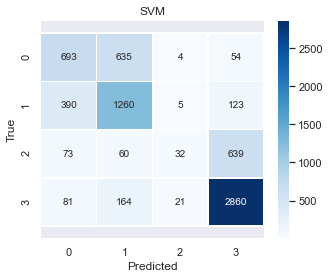

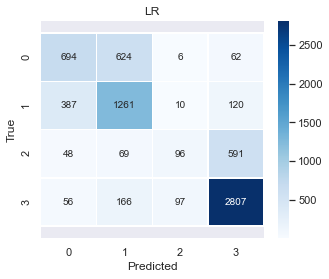

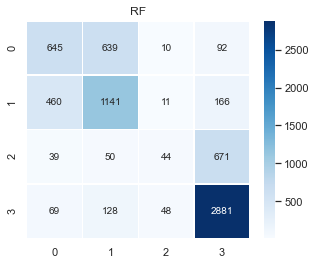

In [113]:
from sklearn.model_selection import cross_val_predict
models = {'SVM': svm_clf, 'LR':lr_clf, 'RF': rf_clf} 

report = []
for k,v in models.items():
    y_pred = cross_val_predict(v,features,labels,cv=kfold)
    cf_matrix = confusion_matrix(labels, y_pred)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.25, top - 0.25)
    ax.set(xlabel='Predicted', ylabel='True')
    plt.figure(k, figsize=(5,4))
    plt.title(k)
    ax = sns.heatmap(cf_matrix, annot=True, linewidths=.5, cmap = 'Blues', fmt="")
    report.append(metrics.classification_report(labels, y_pred, digits=3))

Next, let's examine the **classification reports**.

In [114]:
j = 0
models = ['SVM', 'LR', 'RF']
for i in report:
    print(models[j])
    j += 1
    print(i)

SVM
              precision    recall  f1-score   support

           0      0.560     0.500     0.528      1386
           1      0.595     0.709     0.647      1778
           2      0.516     0.040     0.074       804
           3      0.778     0.915     0.841      3126

    accuracy                          0.683      7094
   macro avg      0.612     0.541     0.522      7094
weighted avg      0.660     0.683     0.644      7094

LR
              precision    recall  f1-score   support

           0      0.586     0.501     0.540      1386
           1      0.595     0.709     0.647      1778
           2      0.459     0.119     0.190       804
           3      0.784     0.898     0.837      3126

    accuracy                          0.685      7094
   macro avg      0.606     0.557     0.553      7094
weighted avg      0.661     0.685     0.658      7094

RF
              precision    recall  f1-score   support

           0      0.532     0.465     0.496      1386
           

Recall for Mm_only is very low.  This is because each of the classifiers makes very few Mm_only predictions.

In all cases, the classifiers tend to incorrectly classify 'Mm_only' respondents as 'Mm_plus'.

Recall for 'No_financial_services' tends to be lower - between 46% and 50% - primarily due to the tendency all three models to misclassify the majority of 'No_financial_services' respondents as 'Other_only'.

Recall for 'Other_only' is relatively higher for SVM and Logistic regression (70%) due to a weaker tendency to misclassify 'No_financial_services' as 'Other_only' than vice versa.  The models are good at distinguishing between the 'Other_only' and the 'MM_only' and 'MM_plus" categories.

Precision and recall for 'Mm_plus' is far higher for all three classifiers.

These results show that all three models are **biased** in favor of the **majority class labels**.

The severity of the bias will ultimately depend on the business use case and constraints such as risk appetite.  For example if the aim is to offer attractive loan packages and statistics show that one group, e.g. 'Other_only', are good payers then precision aims not to mistakenly offer packages to individuals in other groups, while recall aims not to miss out on too many good payers.

**SMOTE**

One way to improve performance would be by re-sampling the dataset to make it more balanced by **up-sampling 'Mm_only'** and **'No_financial_services'**. 

In [115]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_train, test_size = 0.2, stratify=df_train['Service_Type'], random_state = 5)
X_train = train.drop('Service_Type', axis = 1)
y_train = train['Service_Type']
X_test = test.drop('Service_Type', axis = 1)
y_test = test['Service_Type']

In [116]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 5)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [117]:
Counter(y_train)

Counter({3: 2501, 1: 1422, 2: 643, 0: 1109})

In [118]:
Counter(y_train_smote)

Counter({3: 2501, 1: 2501, 2: 2501, 0: 2501})

In [119]:
svm_clf = svm.LinearSVC()
svm_clf.fit(X_train_smote,y_train_smote)
y_predict = svm_clf.predict(X_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(y_predict,y_test))

Accuracy for linear SVM is 0.6412966878083157


<Figure size 360x288 with 0 Axes>

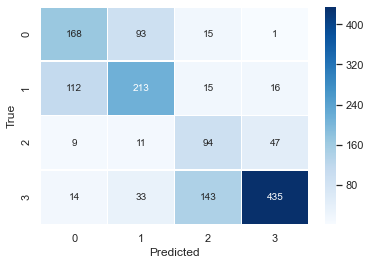

<Figure size 360x288 with 0 Axes>

In [120]:
cf_matrix = confusion_matrix(y_test, y_predict)
ax = sns.heatmap(cf_matrix, annot=True, linewidths=.5, cmap = 'Blues', fmt="")
ax.set(xlabel='Predicted', ylabel='True')
plt.figure(figsize=(5,4))

In [121]:
print(metrics.classification_report(y_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.554     0.606     0.579       277
           1      0.609     0.598     0.603       356
           2      0.352     0.584     0.439       161
           3      0.872     0.696     0.774       625

    accuracy                          0.641      1419
   macro avg      0.597     0.621     0.599      1419
weighted avg      0.685     0.641     0.655      1419



Recall for 'Mm_only' increases dramatically.  As expected, recall for 'Mm_plus' decreases.  Precision for 'Mm_plus' increases as majority class bias is eliminated.

## 4. Implementation (optional)


[Back to top](#Table-of-contents)

## Conclusion

The purpose of this project was to develop a framework to predict the level of financial inclusion among a sample of survey respondents in Tanzania based on socio-economic, demographic and spatial data.  In the experiments conducted Logistic regression, Support Vector Machines and Random Forest classifiers were built to classify individuals into one of four mutually exclusive categories representing varying levels of financial inclusion. All of the models outperformed the **zero rule**. SVM and Logistic regression have an average accuracy score of 68.3% and 68.5% respectively.  SVM has variability in score of about 1.5%.  

All of the models exhibited significant bias toward respondents in the majority categories, with low recall for respondents in the minority categories, particularly respondents who only used mobile money products. This was due to the fact that the dataset of survey respondents was imbalanced.  

Overall, the results of the project demonstrate the potential for the use of machine learning to refine customer targeting and cross-selling. Future work includes enhanced feature engineering including exploring principal compenent analysis ('PCA') for dimensionality reduction, feature engineering and strategies to mitigate the effects of imbalances during the model induction process.

[Back to top](#Table-of-contents)

## References

1. The Mobile Economy Sub-Saharan Africa 2019. *GSMA*. 

2. Sy, Amadou N. R. 2019. Fintech in Sub-Saharan Africa: A Potential Game Changer. *IMFBlog Insights And Analysis On Economics And Finance*.

3. Digital Access: The Future Of Financial Inclusion In Africa. *International Finance Corporation*

4. Ngugi, Brian. 2020. Safaricom To Launch Unit Trust, New Savings Service. *Business Daily Africa*.

5. Finscope Tanzania 2017. 

2. Nabi, Javaid. 2018. Machine Learning — Multiclass Classification with Imbalanced Dataset. *Medium* 

[Back to top](#Table-of-contents)